<a href="https://colab.research.google.com/github/PhuongAnh2212/ENG202LidarData/blob/main/Individual_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


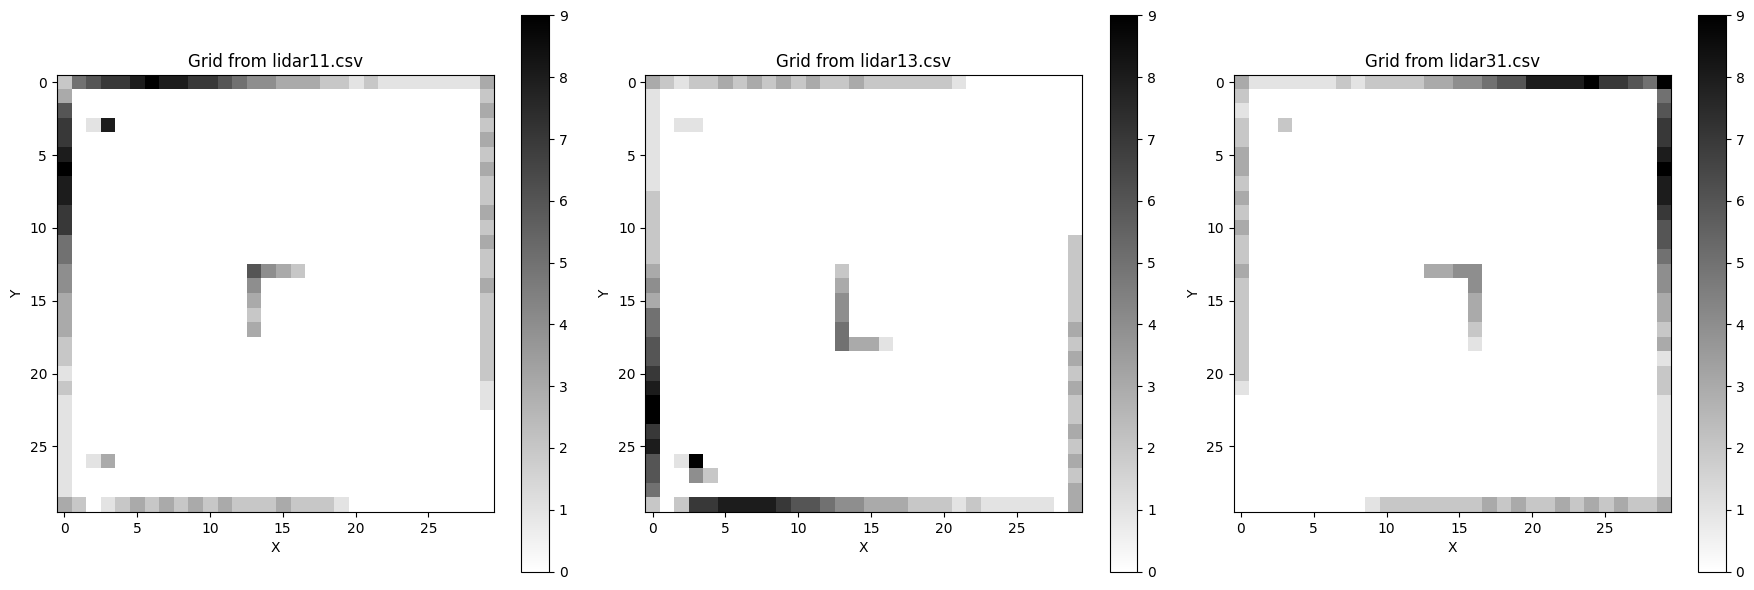

In [8]:
def process_data(file_name):
    df = pd.read_csv(file_name)
    x = df['x'].values
    y = df['y'].values
    x_grid = np.clip(np.floor((x - min(x)) / (max(x) - min(x)) * 30), 0, 29).astype(int)
    y_grid = np.clip(np.floor((y - min(y)) / (max(y) - min(y)) * 30), 0, 29).astype(int)
    grid = np.zeros((30, 30))

    for i in range(len(x_grid)):
        grid[y_grid[i], x_grid[i]] += 1

    return grid

files = [
    'lidar11.csv',
    'lidar13.csv',
    'lidar31.csv'
]

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, file in enumerate(files):
    grid = process_data(file)
    ax = axes[i]
    norm = Normalize(vmin=0, vmax=np.max(grid))
    cax = ax.imshow(grid, cmap='binary', interpolation='nearest', norm=norm)
    ax.set_title(f'Grid from {file}')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')

    fig.colorbar(cax, ax=ax, orientation='vertical')

plt.tight_layout()
plt.show()


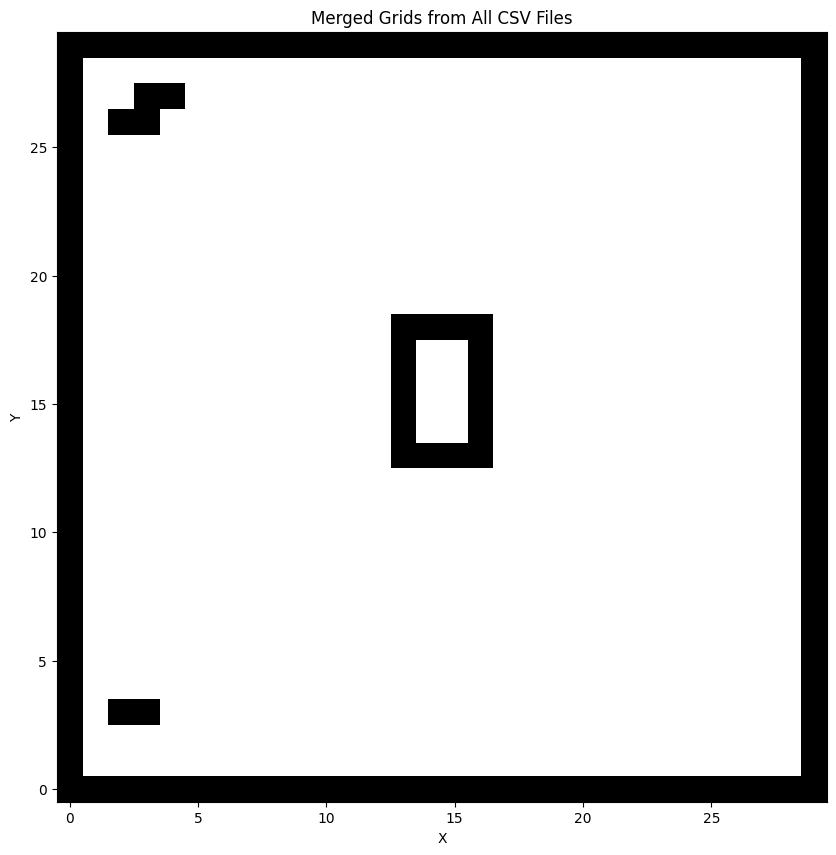

In [25]:
def process_data(file_name):
    df = pd.read_csv(file_name)
    x = df['x'].values
    y = df['y'].values
    x_grid = np.clip(np.floor((x - min(x)) / (max(x) - min(x)) * 30), 0, 29).astype(int)
    y_grid = np.clip(np.floor((y - min(y)) / (max(y) - min(y)) * 30), 0, 29).astype(int)

    grid = np.zeros((30, 30), dtype=int)

    for i in range(len(x_grid)):
        grid[y_grid[i], x_grid[i]] = 1

    return grid

files = [
    'lidar11.csv',
    'lidar13.csv',
    'lidar31.csv'
]
merged_grid = np.zeros((30, 30))

for file in files:
    grid = process_data(file)
    merged_grid = np.maximum(merged_grid, grid)

plt.figure(figsize=(12, 10))
plt.imshow(merged_grid, cmap='binary', origin='lower', interpolation='nearest')
plt.title('Merged Grids from All CSV Files')
plt.xlabel('X')
plt.ylabel('Y')

plt.colorbar(cax, orientation='vertical')
plt.show()
np.save('merged_grid_simu.npy', merged_grid)


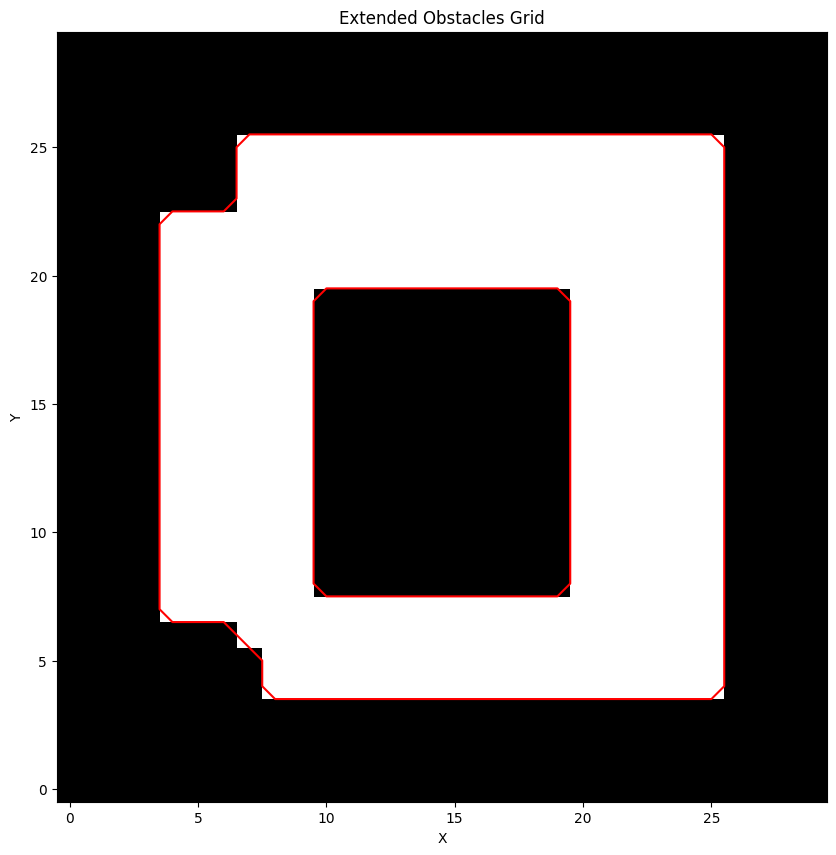

[[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1]
 [1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1]
 [1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1]
 [1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1]
 [1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1]
 [1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1]
 [1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1]
 [1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1]
 [1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1]
 [1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1]
 [1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1]
 [1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import binary_dilation


def extend_obstacles(grid, obstacle_value=1, extension_size=1):
    """
    Extends obstacles in a grid map using morphological dilation.

    Args:
        grid: The input grid map (NumPy array).
        obstacle_value: The value representing obstacles in the grid.
        extension_size: The number of cells to extend the obstacle by in each direction.

    Returns:
        The grid map with extended obstacles.
    """
    # Create a binary obstacle map
    obstacle_map = (grid == obstacle_value)

    # Define a structuring element for morphological dilation (square neighborhood)
    structuring_element = np.ones((2 * extension_size + 1, 2 * extension_size + 1))

    # Perform binary morphological dilation
    extended_obstacle_map = binary_dilation(obstacle_map, structure=structuring_element)

    # Map the extended obstacle map back to the original obstacle value
    extended_grid = np.where(extended_obstacle_map, obstacle_value, 0)
    extended_grid = np.flipud(extended_grid)

    return extended_grid


# Example usage:
extended_grid = extend_obstacles(merged_grid, obstacle_value=1, extension_size=3)

# Visualization
plt.figure(figsize=(12, 10))
plt.imshow(extended_grid, cmap='binary', origin="lower" , interpolation='nearest')
plt.title('Extended Obstacles Grid')
plt.xlabel('X')
plt.ylabel('Y')

# Add the contour after setting title and labels
plt.contour(extended_grid, levels=[0.5], colors='red')  # Add a red boundary

plt.show()
print(extended_grid)

np.save('extended_grid_lol.npy', extended_grid)


In [31]:
import numpy as np
import heapq

DIRECTIONS = [(0, 1), (1, 0), (0, -1), (-1, 0), (1, 1), (1, -1), (-1, -1), (-1, 1)]

def heuristic(a, b):
    """Calculate the Manhattan distance (L1 norm) between two points."""
    return abs(a[0] - b[0]) + abs(a[1] - b[1])

def a_star(grid, start, end):
    open_list = []
    closed_list = set()

    start_x, start_y = start
    end_x, end_y = end

    g_cost = {start: 0}
    f_cost = {start: heuristic(start, end)}
    parents = {start: None}

    heapq.heappush(open_list, (f_cost[start], start))

    while open_list:
        current_f, current_node = heapq.heappop(open_list)
        current_x, current_y = current_node

        if current_node == end:
            path = []
            while current_node is not None:
                path.append(current_node)
                current_node = parents[current_node]
            return path[::-1]

        closed_list.add(current_node)

        for dx, dy in DIRECTIONS:
            neighbor = (current_x + dx, current_y + dy)

            if not (0 <= neighbor[0] < grid.shape[0] and 0 <= neighbor[1] < grid.shape[1]):
                continue
            if grid[neighbor[0], neighbor[1]] == 1:
                continue
            if neighbor in closed_list:
                continue

            tentative_g = g_cost[current_node] + 1
            h_cost = heuristic(neighbor, end)
            f_cost_value = tentative_g + h_cost

            # Print the costs (g, h, f) for each node expanded
            # print(f"Expanding {neighbor}: g = {tentative_g}, h = {h_cost}, f = {f_cost_value}")

            if neighbor not in g_cost or tentative_g < g_cost[neighbor]:
                g_cost[neighbor] = tentative_g
                f_cost[neighbor] = f_cost_value
                parents[neighbor] = current_node
                heapq.heappush(open_list, (f_cost_value, neighbor))

    return None


start_point = (22, 9)
end_point = (5, 22)
path = a_star(extended_grid, start_point, end_point)

if path:
    # Convert the path to a NumPy array
    path_array = np.array(path)
    print(path_array)

    # Save the path array to an .npy file
    np.save('path_lol.npy', path_array)
    print("Path saved to path.npy")
else:
    print("No path found.")

[[22  9]
 [21 10]
 [20 11]
 [20 12]
 [20 13]
 [20 14]
 [20 15]
 [20 16]
 [20 17]
 [20 18]
 [20 19]
 [19 20]
 [18 21]
 [17 22]
 [16 22]
 [15 22]
 [14 22]
 [13 22]
 [12 22]
 [11 22]
 [10 22]
 [ 9 22]
 [ 8 22]
 [ 7 22]
 [ 6 22]
 [ 5 22]]
Path saved to path.npy


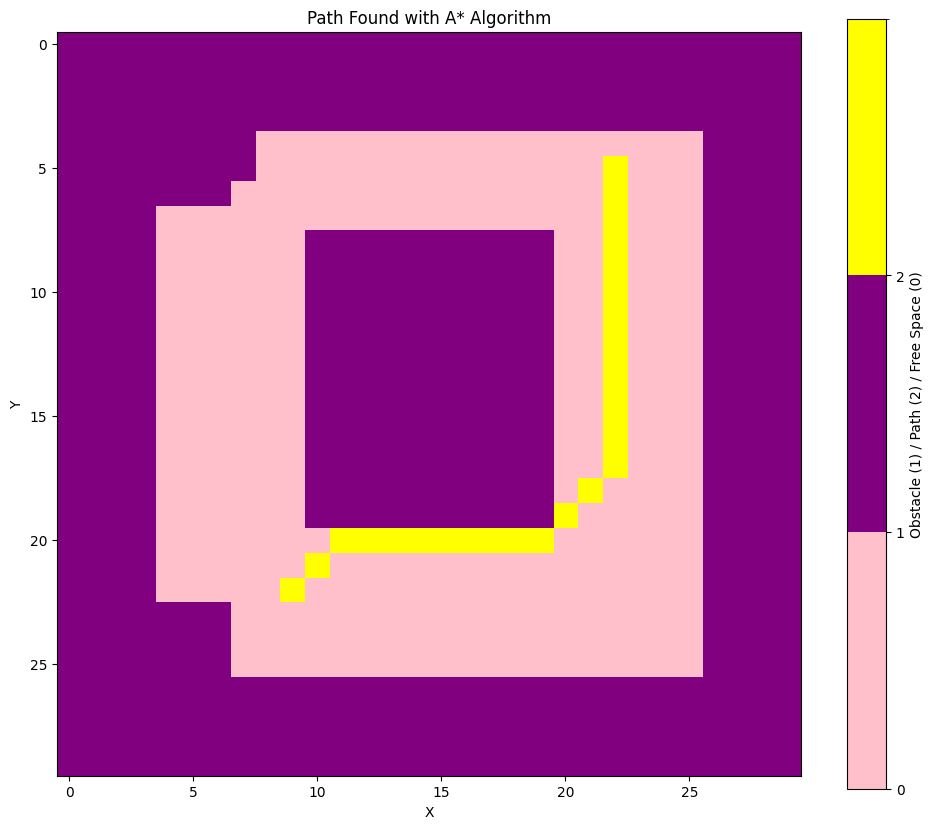

In [32]:
import matplotlib.colors as mcolors

# Create a grid for visualization
path_grid = np.copy(extended_grid)
for x, y in path:
    path_grid[x, y] = 2

cmap = mcolors.ListedColormap(['pink', 'purple', 'yellow'])  # Mapping [0, 1, 2]
bounds = [0, 1, 2, 3]  # Boundaries for the 3 classes
norm = mcolors.BoundaryNorm(bounds, cmap.N)

# Plot the merged grid with the path
plt.figure(figsize=(12, 10))
plt.imshow(path_grid, cmap=cmap, norm=norm, interpolation='nearest')
plt.title('Path Found with A* Algorithm')
plt.xlabel('X')
plt.ylabel('Y')

# Adding a colorbar for reference
plt.colorbar(ticks=[0, 1, 2], label='Obstacle (1) / Path (2) / Free Space (0)')
plt.show()